# Purpose: Fit data points from an FAO graph, add a 2015 data point from Keenan et al., do an analytically integrable functional fit to global area deforestation using the global population increment logistic inflection time, and Export the data pairs to an Excel file

Clear all variables and import necessary libararies and change the working directory

In [1]:
%reset -f
import os,sys
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import csv
import numpy as np
from scipy.optimize import curve_fit
os.chdir('C:\\Users\\cd7\\Desktop\\Heat17Deforest')

Formulate the exported file name

In [2]:
out1 = 'heat';
out2 = 'deforest';
months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'] # abbreviations for months to insert in output file name)
date = datetime.date.today().strftime("%Y-%m-%d")
date_split = date.split('-')
yrs = str(int(date_split[0])-2000)
seq = [out1, yrs, months[int(date_split[1])-1],date_split[2],'deforest']
seperator = ','
filename = seperator.join(seq).replace(',', '')

Read the raw data from excel sheet as inputs

           Year  Deforestation
0   1799.970445       0.840283
1   1809.975182       0.859364
2   1819.978600       0.889046
3   1829.983074       0.910247
4   1839.986492       0.939929
5   1849.989909       0.969611
6   1859.993327       0.999293
7   1869.996482       1.031095
8   1879.997788       1.077739
9   1889.999623       1.120141
10  1900.000666       1.168905
11  1910.001445       1.219788
12  1920.002488       1.268551
13  1930.003267       1.319435
14  1940.004310       1.368198
15  1950.005089       1.419081
16  1960.004813       1.478445
17  1970.004272       1.539929
18  1980.002940       1.607774
19  1989.998970       1.696820
20  1999.998429       1.758304
21  2009.999208       1.809187
22  2015.000000       1.825726
2003.3438306791484


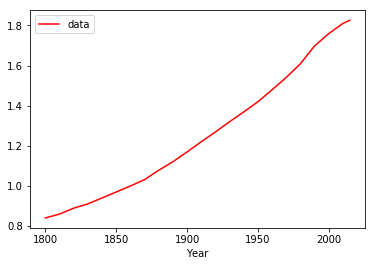

In [3]:
df = pd.read_excel('raw data.xlsx') # The graph is from p.3 of Chapter 2, "Forests and evolution of the modern world," Food and Agriculture Organization. 2012. State of the World's Forests 2012, http://www.fao.org/docrep/016/i3010e/i3010e.pdf. The 2010 and 2015 numbers for total forested area are from Keenan, R., G. Reams, F. Achard, J. de Freitas, A. Granger, and E. Lindquist, Dyanmics of global forest area: Results from the FAO global forest resources assessment 2015, Forest and Ecology Management 352, 9\[Dash]20.
gigahectare2010 = 4.015673;
gigahectare2015 = 3.999134;
y2015 = df.iloc[-1,-1] + gigahectare2010 - gigahectare2015;
df.loc[22] = [2015, y2015]  # adding a row
df.plot(x='Year',y='Deforestation',color = 'r', label ='data')
print (df)
f = open('C:\\Users\\cd7\\Desktop\\Heat17Population\\CAGE_Pop_Parameters.csv','r')
readFile = csv.reader(f)
data = [row for row in readFile]
b2 = float(data[3][1]) # b2 is from heat17pop13dec.nb
print (b2)
yrs = df.iloc[:,0]
yrs = yrs.tolist()
ydata = df.iloc[:,1]
ydata = ydata.tolist()

Define the fitted logistic function and use non-linear least square method to fit the historical data

In [4]:
def logistic(yrs,b1,b3):
     y = b1 / (1 + np.exp(-(yrs-b2)/b3))
     return y
param_bounds=([3,150],[5,200])
popt, pcov = curve_fit(logistic, yrs, ydata, bounds=param_bounds)
print (popt)

[  3.46508368 162.69637396]


Plot the fitted function and compare it with historical data and save the results in a csv file

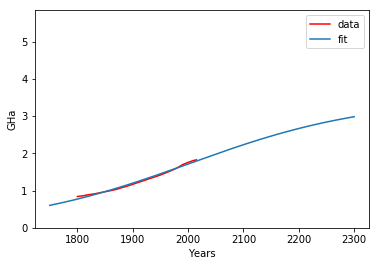

In [5]:
b1b2b3param = pd.DataFrame({'Name':['b1','b2','b3'],'Values':[popt[0],b2,popt[1]],'Units':['Year','Julian Year','1/Year'],'Meaning':['Saturation value','Inflection time','Initial growth rate']}, columns=["Name", "Values", "Units", "Meaning"])
b1b2b3param.to_csv('CAGE_Deforest_Parameters.csv', index=False)
start = gigahectare2010 + ydata[-1] # estimated pre-anthropogenic forest cover, to be compared 6 GHa estimate from the FAO reference
df.plot(x='Year',y='Deforestation',color = 'r',label ='data')
x_new = list(range(1750,2301)) # plot from year 1750 to 2300
x = np.array(x_new)
fit = logistic(x, *popt)
plt.ylim(0,start) # set y-axis limit for plotting
plt.plot(x,fit, label ='fit')
plt.xlabel('Years')
plt.ylabel('GHa')
plt.legend(loc='best')
plt.savefig('deforest.eps',dpi=1000)
plt.show()

df.loc[-1]=['Julian','GHa'] # add an another header
df.index = df.index+1 
df = df.sort_index() # reorder rows by sorting their index number in an ascending way
df.loc[(len(df))] = ['2017/12/13','heat17deforest13dec.nb'] # add a footer
df.to_csv(filename + '.csv', index=False)